In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Fake data generation

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # transfrom 1d data to 2d

In [5]:
x.size()

torch.Size([100, 1])

In [4]:
y = x.pow(2) + 0.2*torch.rand(x.size())

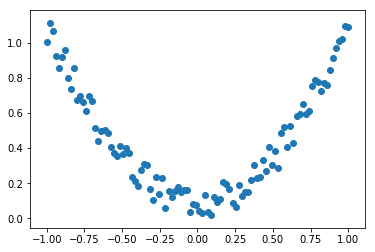

In [6]:
plt.scatter(x.data.numpy(),y.data.numpy())

## Construct Neural Network

In [7]:
x,y = Variable(x),Variable(y)

In [8]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [9]:
net = Net(1,10,1)

In [11]:
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [21]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.3)

In [22]:
loss_func = torch.nn.MSELoss()

## Training

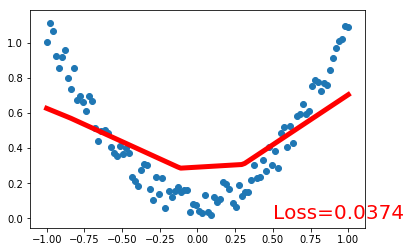

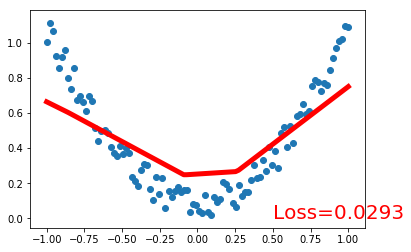

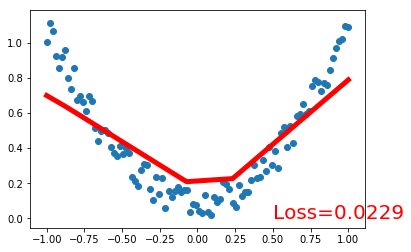

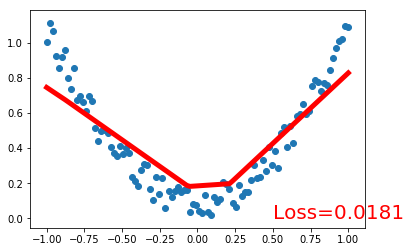

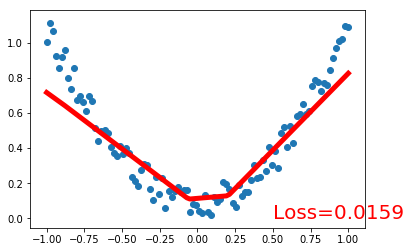

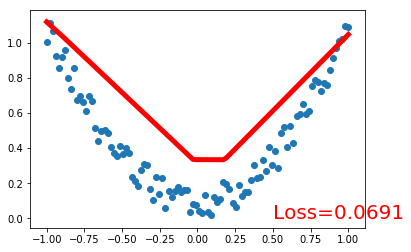

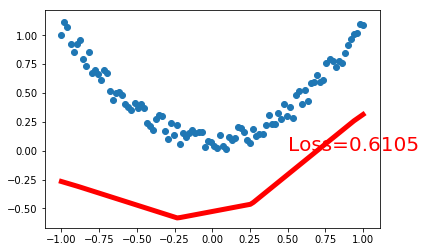

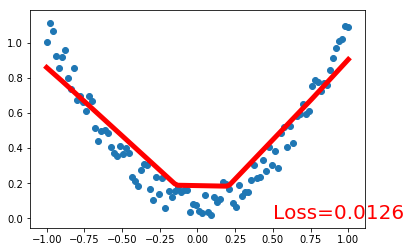

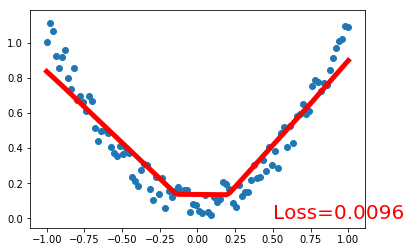

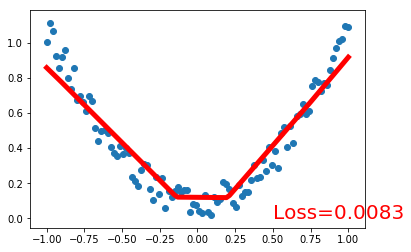

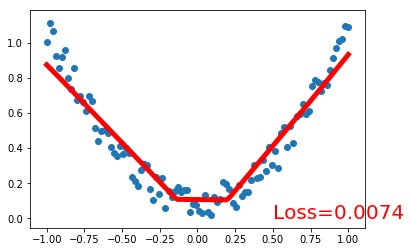

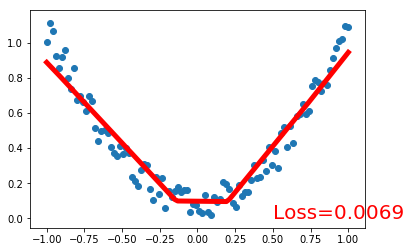

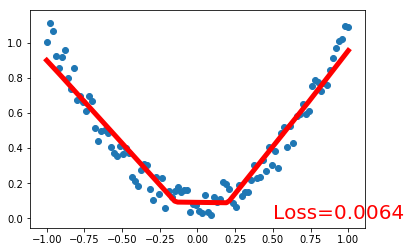

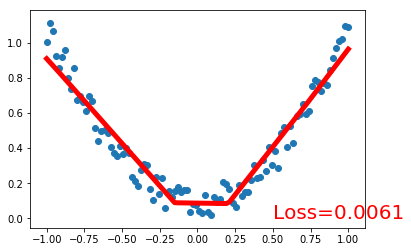

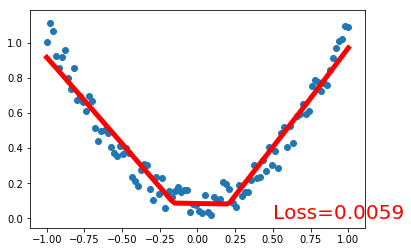

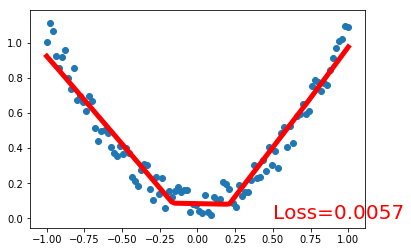

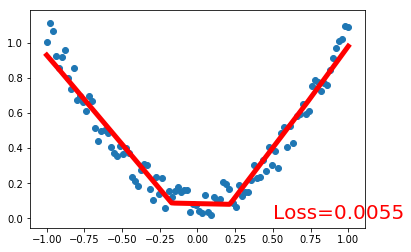

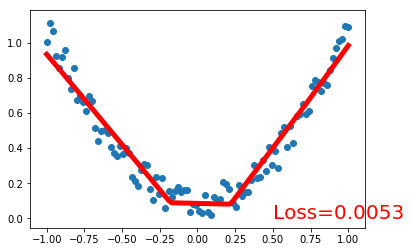

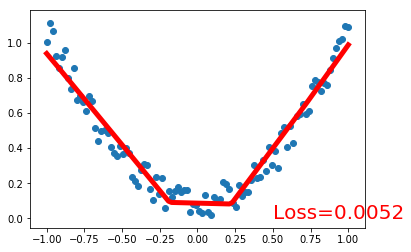

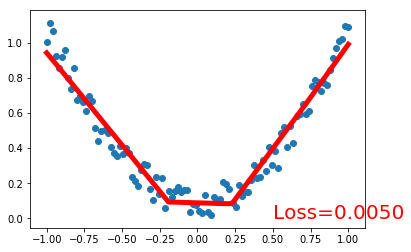

In [23]:
plt.ion() # plot all the time
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad() # initialize grad with zero
    loss.backward()
    optimizer.step()  # optimize the weight
    
    if t%5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.item(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        
plt.ioff()